# Hodgkin-Huxley models

In [1]:
from numpy import *
import matplotlib.pyplot as plt
from scipy.integrate import odeint

## Single neuron dynamics

In [2]:
C_m = 9 * pi
E_Na = 115
E_K = - 12
V_rest =10.6
G_Na = 1080 * pi
G_K = 324 * pi
G_m = 2.7 * pi

In [3]:
def a_m(V): return (25 - V) / (10 * (exp((25 - V) / 10) - 1))
def b_m(V): return 4 * exp(- V / 18)
def a_n(V): return (10 - V) / (100 * (exp((10 - V) / 10) - 1))
def b_n(V): return 0.125 * exp(- V / 80)
def a_h(V): return 0.07 * exp( - V / 20)
def b_h(V): return 1 / (exp((30 - V) / 10) + 1)

In [4]:
def HH(z, t):
    V, m, n, h = z
    v1 = (G_Na * m**3 * h * (E_Na - V) + G_K * n**4 * (E_K - V) + G_m * (V_rest - V) + I) / C_m
    v2 = a_m(V) * (1 - m) - b_m(V) * m
    v3 = a_n(V) * (1 - n) - b_n(V) * n
    v4 = a_h(V) * (1 - h) - b_h(V) * h
    return v1, v2, v3, v4

### Tiem evolution for $I = 280pA$

In [46]:
I = 280
z0 = [V_rest, random.uniform(), random.uniform(), random.uniform()]
t = arange(0.0, 150.0, 0.1)

In [47]:
prob = odeint(HH, z0, t)

Text(0.5, 1.0, '$I=280pA$')

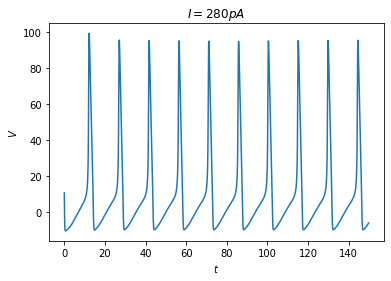

In [48]:
plt.figure(1)
plt.plot(t,prob[:,0])
plt.xlabel('$t$')
plt.ylabel('$V$')
plt.title('$I=280pA$')

In [49]:
I_K = (G_K * (prob[:, 2]**4) * (E_K - prob[:, 0]))
I_Na = (G_Na * (prob[:, 1]**3) * prob[:, 3] * (E_Na - prob[:, 0]))
I_L = (G_m * (V_rest - prob[:, 0]))

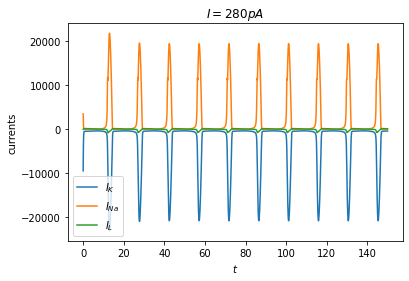

In [50]:
plt.plot(t, I_K, label = '$I_K$')
plt.plot(t, I_Na, label = '$I_{Na}$')
plt.plot(t, I_L, label = '$I_L$')
plt.xlabel('$t$')
plt.ylabel('currents')
plt.title('$I=280pA$')
plt.legend()

### Time evolution for $I = 350pA$

In [51]:
I = 350
z0 = [V_rest, random.uniform(), random.uniform(), random.uniform()]
t = arange(0.0, 150.0, 0.1)

In [52]:
prob = odeint(HH, z0, t)

Text(0.5, 1.0, '$I=350pA$')

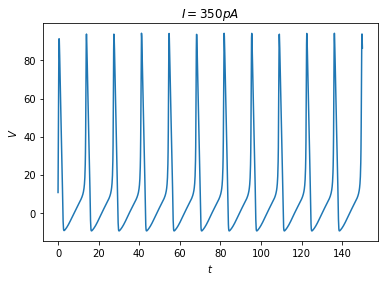

In [53]:
plt.figure(1)
plt.plot(t,prob[:,0])
plt.xlabel('$t$')
plt.ylabel('$V$')
plt.title('$I=350pA$')

In [54]:
I_K = (G_K * (prob[:, 2]**4) * (E_K - prob[:, 0]))
I_Na = (G_Na * (prob[:, 1]**3) * prob[:, 3] * (E_Na - prob[:, 0]))
I_L = (G_m * (V_rest - prob[:, 0]))

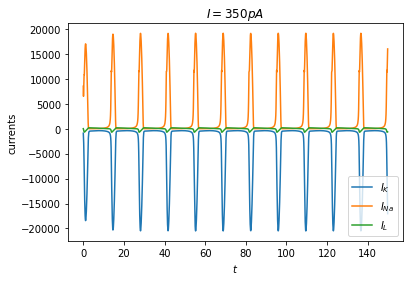

In [55]:
plt.plot(t, I_K, label = '$I_K$')
plt.plot(t, I_Na, label = '$I_{Na}$')
plt.plot(t, I_L, label = '$I_L$')
plt.xlabel('$t$')
plt.ylabel('currents')
plt.title('$I=350pA$')
plt.legend()

### Pulsating frequency vs. current

In [56]:
from scipy.signal import peak_prominences as peakproms
from scipy.signal import find_peaks

In [57]:
def ex2(a, b, u0, f):
    for j in range(a, b):
        global I
        I = j
        prob = odeint(HH, u0, t)
        volt=prob[:, 0]
        peaks,_ = find_peaks(volt, height = 80) 
        freq = len(peakproms(volt, peaks)[0])
        f.append(freq)
        u0 = [volt[-1], prob[:, 1][-1], prob[:, 2][-1], prob[:, 3][-1]]
    return f

In [58]:
f = []
ex2(149, 350, z0, f);

Text(0, 0.5, '$f$')

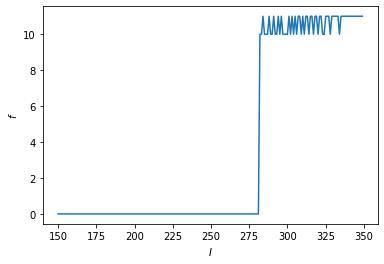

In [59]:
plt.plot([i for i in range(150, 350)], f[1:])
plt.xlabel('$I$')
plt.ylabel('$f$')

In [60]:
def ex3(a, b, u0, f):
    for j in range(a, b, -1):
        global I
        I = j
        prob = odeint(HH, u0, t)
        volt = prob[:, 0]
        peaks,_ = find_peaks(volt, height = 80) 
        freq = len(peakproms(volt, peaks)[0])
        f.append(freq)
        u0 = [volt[-1], prob[:, 1][-1], prob[:, 2][-1], prob[:, 3][-1]]
    return f

In [61]:
rf = []
ex3(350, 150, z0, rf);

Text(0, 0.5, '$f$')

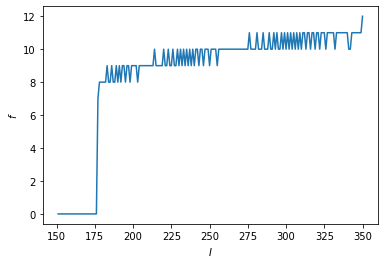

In [62]:
plt.plot([i for i in range(350, 150, -1)], rf)
plt.xlabel('$I$')
plt.ylabel('$f$')

Text(0, 0.5, '$f$')

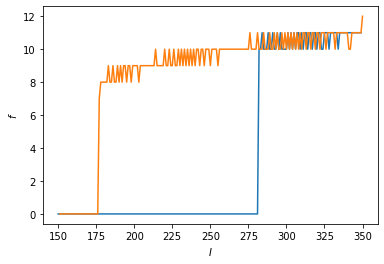

In [63]:
plt.plot([i for i in range(150,350)], f[1:])
plt.plot([i for i in range(350, 150,-1)], rf)
plt.xlabel('$I$')
plt.ylabel('$f$')

## Coupled Hodgkin-Huxley neurons

In [2]:
C_m = 9 * pi
E_Na = 115
E_K = - 12
V_rest = 10.6
G_Na = 1080 * pi
G_K = 324 * pi
G_m = 2.7 * pi

In [3]:
def a_m(V): return (25 - V)/(10*( exp((25-V)/10)-1))
def b_m(V): return 4 * exp(-V/18)
def a_n(V): return (10 - V)/(100*(exp((10-V)/10) - 1))
def b_n(V): return 0.125 * exp(-V/80)
def a_h(V): return 0.07 * exp(-V/20)
def b_h(V): return 1/(exp((30 - V)/10) + 1)
def I_A(V, r_A): return 10 * r_A * (60 - V)
def I_G(V, r_G): return 10 * r_G * (-20 - V)
def f(Vpre): return 1/(1 + exp(-(Vpre - 62)/5))

### For example if cecond one is GABA

In [4]:
def HHG(z,t):
    
    Vp, mp, np, hp, V, m, n, h, r_G = z
    
    v1 = (G_Na * mp**3 * hp * (E_Na - Vp) + G_K * np**4 * (E_K - Vp) + G_m * (V_rest - Vp) + I)/C_m #+\
    #I_A(Vp, r_A)
    v2 = a_m(Vp) * (1-mp) - b_m(Vp) * mp
    v3 = a_n(Vp) * (1-np) - b_n(Vp) * np
    v4 = a_h(Vp) * (1-hp) - b_h(Vp) * hp
    
    u1 = (G_Na * m**3 * h * (E_Na - V) + G_K * n**4 * (E_K - V) + G_m * (V_rest - V) + I +\
    I_G(V, r_G))/C_m
    u2 = a_m(V) * (1-m) - b_m(V) * m
    u3 = a_n(V) * (1-n) - b_n(V) * n
    u4 = a_h(V) * (1-h) - b_h(V) * h
    u5 = 5 * f(Vp) * (1 - r_G) - 0.3 * r_G
    
    return v1, v2, v3, v4, u1, u2, u3, u4, u5

In [11]:
I = 280
z0=[V_rest, random.uniform(), random.uniform(), random.uniform(),\
    0, random.uniform(), random.uniform(), random.uniform(), random.uniform()]
t = arange(0.0, 130.0, 0.1)
prob=odeint(HHG, z0, t)

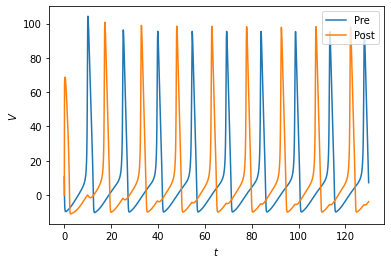

In [12]:
plt.plot(t,prob[:,0],label='Pre')
plt.plot(t,prob[:,4],label='Post')
plt.xlabel('$t$')
plt.ylabel('$V$')
plt.legend()

***